###### 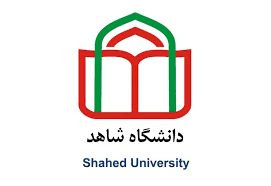

## Course: Artificial Neural Networks
#### Course Instructor: Professor Ali Moti Nasrabadi
#### Teaching Assistant: Hossein Pakdaman Moghaddam

# Python Utilities 

In this section, we look at a few of Python's many standard utility modules to solve common problems.

## File System -- os, os.path, shutil

The *os* and *os.path* modules include many functions to interact with the file system. The *shutil* module can copy files.

* os module docs

* filenames = os.listdir(dir) -- list of filenames in that directory path (not including . and ..). The filenames are just the names in the directory, not their absolute paths.
  
* os.path.join(dir, filename) -- given a filename from the above list, use this to put the dir and filename together to make a path
  
* os.path.abspath(path) -- given a path, return an absolute form, e.g. /home/nick/foo/bar.html
  
* os.path.dirname(path), os.path.basename(path) -- given dir/foo/bar.html, return the dirname "dir/foo" and basename "bar.html"
  
* os.path.exists(path) -- true if it exists
  
* os.mkdir(dir_path) -- makes one dir, os.makedirs(dir_path) makes all the needed dirs in this path
  
* shutil.copy(source-path, dest-path) -- copy a file (dest path directories should exist)

In [1]:
## Example pulls filenames from a dir, prints their relative and absolute paths
def printdir(dir):
  filenames = os.listdir(dir)
  for filename in filenames:
    print(filename)  ## foo.txt
    print(os.path.join(dir, filename)) ## dir/foo.txt (relative to current dir)
    print(os.path.abspath(os.path.join(dir, filename))) ## /home/nick/dir/foo.txt

Exploring a module works well with the built-in python help() and dir() functions. In the interpreter, do an "import os", and then use these commands look at what's available in the module: dir(os), help(os.listdir), dir(os.path), help(os.path.dirname).

## Running External Processes -- subprocess
The *subprocess* module is a simple way to run an external command and capture its output.

* subprocess module docs
  
* output = subprocess.check_output(cmd, stderr=subprocess.STDOUT) -- runs the command, waits for it to exit, and returns its output text. The command is run with its standard output and standard error combined into the one output text. If it fails, it throws a CalledProcessError.
  
* If you want more control over the running of the sub-process, see the subprocess.popen class
  
* There is also a simple subprocess.call(cmd) which runs the command and dumps its output onto your output and returns its error code. This works if you want to run the command but do not need to capture its output into your python data structures.

In [2]:
import subprocess

## Given a dir path, run an external 'ls -l' on it --
## shows how to call an external program
def listdir(dir):
  cmd = 'ls -l ' + dir
  print("Command to run:", cmd)   ## good to debug cmd before actually running it
  (status, output) = subprocess.getstatusoutput(cmd)
  if status:    ## Error case, print the command's output to stderr and exit
    sys.stderr.write(output)
    sys.exit(status)
  print(output)  ## Otherwise do something with the command's output

## Exceptions
An exception represents a run-time error that halts the normal execution at a particular line and transfers control to error handling code. This section just introduces the most basic uses of exceptions. For example a run-time error might be that a variable used in the program does not have a value (ValueError .. you've probably seen that one a few times), or a file open operation error because a file does not exist (IOError). Learn more in the exceptions tutorial and see the entire exception list.

Without any error handling code (as we have done thus far), a run-time exception just halts the program with an error message. That's a good default behavior, and you've seen it many times. You can add a "try/except" structure to your code to handle exceptions, like this:

The try: section includes the code which might throw an exception. The except: section holds the code to run if there is an exception. If there is no exception, the except: section is skipped (that is, that code is for error handling only, not the "normal" case for the code). You can get a pointer to the exception object itself with syntax "except IOError as e: .." (e points to the exception object).

## HTTP -- urllib and urlparse
The module *urllib.request* provides url fetching -- making a url look like a file you can read from. The *urlparse* module can take apart and put together urls.

* urllib.request module docs

* ufile = urllib.request.urlopen(url) -- returns a file like object for that url

* text = ufile.read() -- can read from it, like a file (readlines() etc. also work)

* info = ufile.info() -- the meta info for that request. info.gettype() is the mime type, e.g. 'text/html'

* baseurl = ufile.geturl() -- gets the "base" url for the request, which may be different from the original because of redirects
  
* urllib.request.urlretrieve(url, filename) -- downloads the url data to the given file path
  
* urllib.parse.urljoin(baseurl, url) -- given a url that may or may not be full, and the baseurl of the page it comes from, return a full url. Use geturl() above to provide the base url.
  
All of exceptions are in urllib.error.

In [4]:
from urllib.request import urlopen

## Given a url, try to retrieve it. If it's text/html,
## print its base url and its text.
def wget(url):
  ufile = urlopen(url)  ## get file-like object for url
  info = ufile.info()   ## meta-info about the url content
  if info.get_content_type() == 'text/html':
    print('base url:' + ufile.geturl())
    text = ufile.read()  ## read all its text
    print(text)

The above code works fine, but does not include error handling if a url does not work for some reason. Here's a version of the function which adds try/except logic to print an error message if the url operation fails.

If urlopen() appears to be hanging, your system may not allow direct access to some http addresses. You can verify this by trying to fetch the same url using wget or curl. If these programs also fail, you'll need to fetch http content through a proxy service. Configuring proxy access is not covered by this tutorial.

In [5]:
## Version that uses try/except to print an error message if the
## urlopen() fails.
def wget2(url):
  try:
    ufile = urlopen(url)
    if ufile.info().get_content_type() == 'text/html':
      print(ufile.read())
  except IOError:
    print('problem reading url:', url)